# Area burned by wildfires by land cover type, World

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

#RANDOM_SEED = 20090425
from scipy.stats import norm,gamma,chi2, expon, uniform, t

from scipy.special import expit

In [11]:
# Load CSV file into a DataFrame
forest = pd.read_csv('data/area-burned-wildfires-by-type.csv')
forest.head()

,Entity,Code,Year,Yearly burned area across shrublands and grasslands,Yearly burned area across savannas,Yearly burned area across forests,Yearly burned area across croplands
0,Afghanistan,AFG,2002,18052.793,0.000,0.0,14167.473
1,Afghanistan,AFG,2003,112030.360,0.000,0.0,21680.530
2,Afghanistan,AFG,2004,24556.953,0.000,0.0,4357.571
3,Afghanistan,AFG,2005,10883.193,64.398,0.0,1395.281
4,Afghanistan,AFG,2006,7169.603,64.398,0.0,9809.900


In [12]:
world_forest_data = forest[(forest['Entity'] == 'World') & (forest['Code'] == 'OWID_WRL')]
world_forest_data.head()

,Entity,Code,Year,Yearly burned area across shrublands and grasslands,Yearly burned area across savannas,Yearly burned area across forests,Yearly burned area across croplands
4851,World,OWID_WRL,2002,242925870.0,158605730.0,24417036.0,35789416.0
4852,World,OWID_WRL,2003,191126500.0,177561680.0,33777550.0,33917016.0
4853,World,OWID_WRL,2004,223480290.0,162904820.0,35284390.0,36734068.0
4854,World,OWID_WRL,2005,196693950.0,183639900.0,33586056.0,41020372.0
4855,World,OWID_WRL,2006,210652450.0,150567600.0,31339608.0,36541216.0


# Yearly Burned Areas Across Different Land Types

This plot illustrates the yearly burned areas across various land types, including shrublands and grasslands, savannas, forests, and croplands. Each subplot represents the burned area (in hectares) over the years for a specific land type.

- **Yearly burned area across shrublands and grasslands:** This subplot shows the burned area across shrublands and grasslands over time.
- **Yearly burned area across savannas:** Here, the burned area across savannas is depicted annually.
- **Yearly burned area across forests:** The subplot displays the burned area across forests throughout the years.
- **Yearly burned area across croplands:** Lastly, the burned area across croplands is presented on an annual basis.

The x-axis represents the years, while the y-axis indicates the burned area in hectares. Each subplot provides insights into the trends and variations in burned areas across different land types over time.


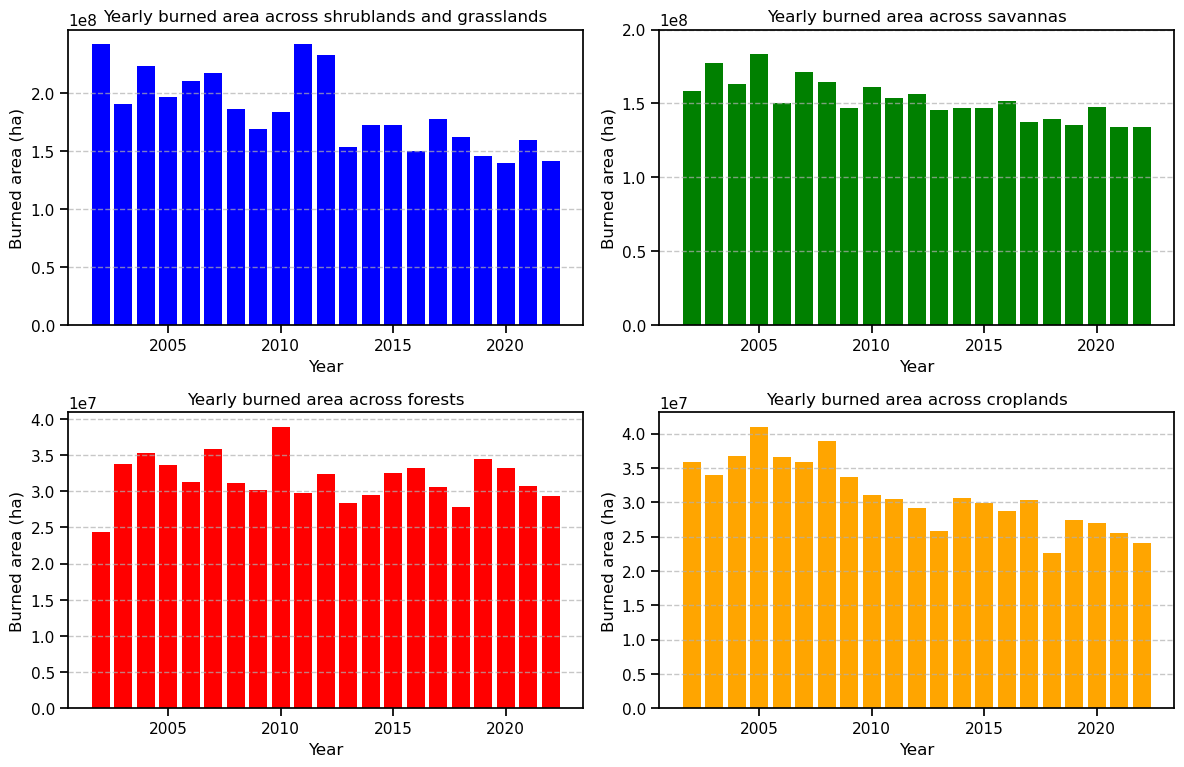

In [13]:
import matplotlib.pyplot as plt

# Extracting data for plotting
years = world_forest_data['Year']
shrublands_grasslands = world_forest_data['Yearly burned area across shrublands and grasslands']
savannas = world_forest_data['Yearly burned area across savannas']
forests = world_forest_data['Yearly burned area across forests']
croplands = world_forest_data['Yearly burned area across croplands']

# Plotting
plt.figure(figsize=(12, 8))

# Plot for Yearly burned area across shrublands and grasslands
plt.subplot(2, 2, 1)
plt.bar(years, shrublands_grasslands, color='b')
plt.title('Yearly burned area across shrublands and grasslands')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
plt.yticks(range(0, 200000000 + 50000000, 50000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Yearly burned area across savannas
plt.subplot(2, 2, 2)
plt.bar(years, savannas, color='g')
plt.title('Yearly burned area across savannas')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
plt.yticks(range(0, 200000000+ 50000000, 50000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Yearly burned area across forests
plt.subplot(2, 2, 3)
plt.bar(years, forests, color='r')
plt.title('Yearly burned area across forests')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
#plt.yticks(range(0, 200000000 + 50000000, 50000000))
#plt.yticks(range(0, 50000000 + 5000000, 25000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Yearly burned area across croplands
plt.subplot(2, 2, 4)
plt.bar(years, croplands, color='orange')
plt.title('Yearly burned area across croplands')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
#plt.yticks(range(0, 50000000 + 5000000, 25000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Wildfire area burned by land cover type, 2002 to 2022

In [14]:
# Load CSV file into a DataFrame
land = pd.read_csv('data/annual-burned-area-by-landcover.csv')
land.head()

,Entity,Code,Year,Yearly burned area across other land categories,Yearly burned area across croplands,Yearly burned area across forests,Yearly burned area across savannas,Yearly burned area across shrublands and grasslands
0,Afghanistan,AFG,2002,0.0000,14167.473,0.0,0.000,18052.793
1,Afghanistan,AFG,2003,1309.4180,21680.530,0.0,0.000,112030.360
2,Afghanistan,AFG,2004,407.8520,4357.571,0.0,0.000,24556.953
3,Afghanistan,AFG,2005,85.8640,1395.281,0.0,64.398,10883.193
4,Afghanistan,AFG,2006,1116.2269,9809.900,0.0,64.398,7169.603


In [15]:
world_land_data = land[(land['Entity'] == 'World') & (land['Code'] == 'OWID_WRL')]
world_land_data.head()

,Entity,Code,Year,Yearly burned area across other land categories,Yearly burned area across croplands,Yearly burned area across forests,Yearly burned area across savannas,Yearly burned area across shrublands and grasslands
4851,World,OWID_WRL,2002,920907.30,35789416.0,24417036.0,158605730.0,242925870.0
4852,World,OWID_WRL,2003,953664.25,33917016.0,33777550.0,177561680.0,191126500.0
4853,World,OWID_WRL,2004,1019178.10,36734068.0,35284390.0,162904820.0,223480290.0
4854,World,OWID_WRL,2005,1557241.50,41020372.0,33586056.0,183639900.0,196693950.0
4855,World,OWID_WRL,2006,1230681.20,36541216.0,31339608.0,150567600.0,210652450.0


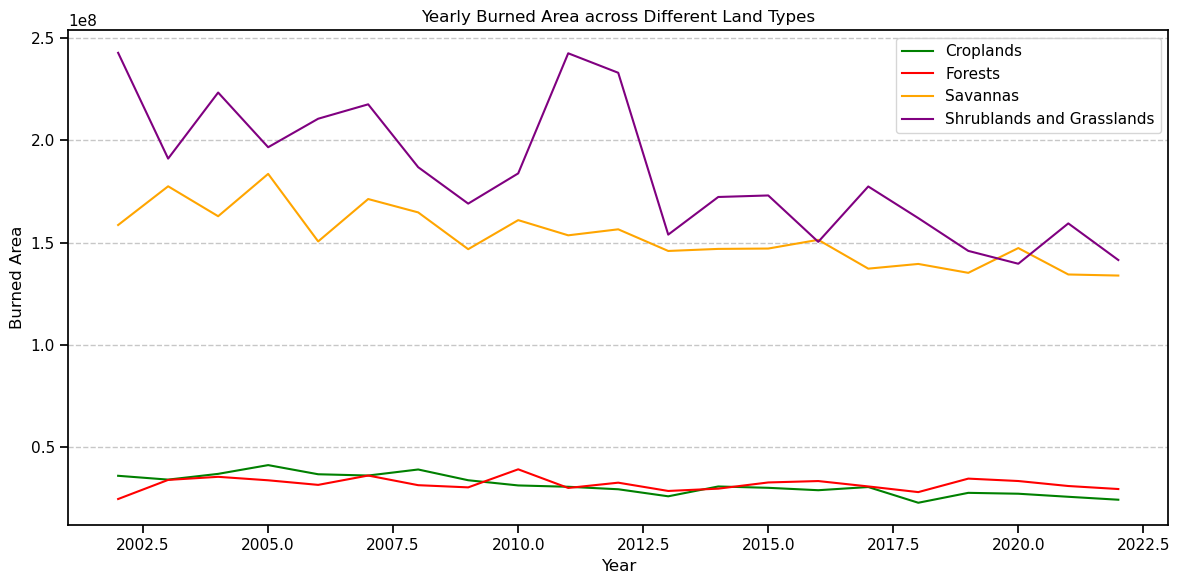

In [16]:
import matplotlib.pyplot as plt

# Extracting data for plotting
years = world_land_data['Year']
other_land = world_land_data['Yearly burned area across other land categories']
croplands = world_land_data['Yearly burned area across croplands']
forests = world_land_data['Yearly burned area across forests']
savannas = world_land_data['Yearly burned area across savannas']
shrublands_grasslands = world_land_data['Yearly burned area across shrublands and grasslands']

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(years, croplands, label='Croplands', color='green')
plt.plot(years, forests, label='Forests', color='red')
plt.plot(years, savannas, label='Savannas', color='orange')
plt.plot(years, shrublands_grasslands, label='Shrublands and Grasslands', color='purple')

plt.title('Yearly Burned Area across Different Land Types')
plt.xlabel('Year')
plt.ylabel('Burned Area')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



The above line plot illustrates the yearly burned area across various land types, including croplands, forests, savannas, and shrublands/grasslands. Each line represents the burned area (in hectares) over the years for a specific land type.

- **Croplands:** The green line depicts the yearly burned area across croplands.
- **Forests:** The red line represents the burned area across forests annually.
- **Savannas:** The orange line shows the burned area across savannas over time.
- **Shrublands and Grasslands:** The purple line indicates the burned area across shrublands and grasslands throughout the years.

The x-axis represents the years, while the y-axis indicates the burned area in hectares. This plot provides insights into the trends and variations in burned areas across different land types over time.


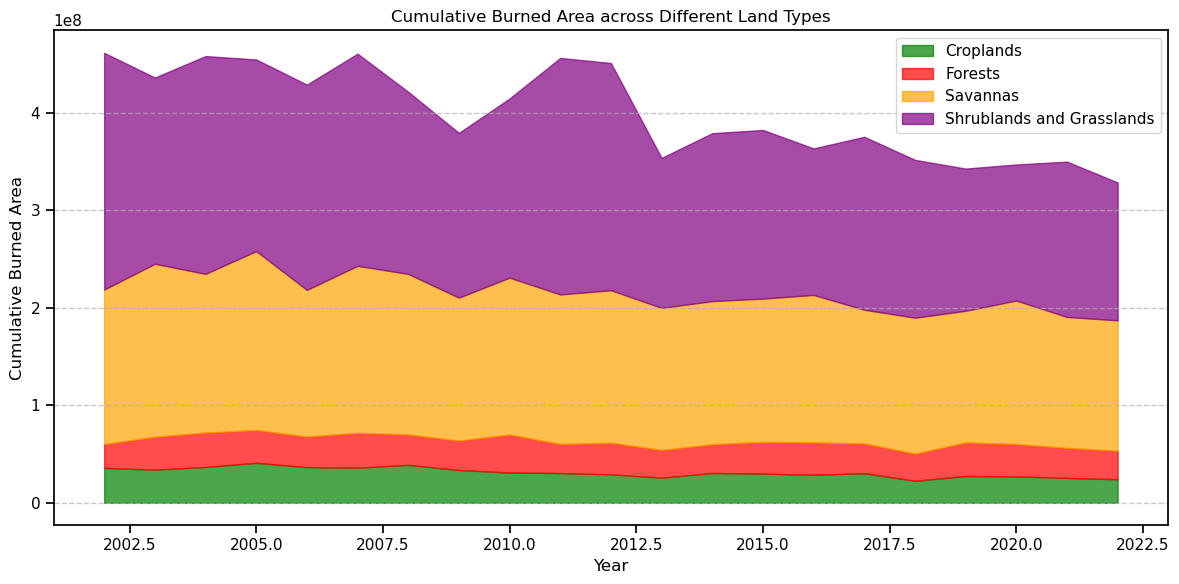

In [17]:
import matplotlib.pyplot as plt

# Extracting data for plotting
years = world_land_data['Year']
croplands = world_land_data['Yearly burned area across croplands']
forests = world_land_data['Yearly burned area across forests']
savannas = world_land_data['Yearly burned area across savannas']
shrublands_grasslands = world_land_data['Yearly burned area across shrublands and grasslands']

# Plotting
plt.figure(figsize=(12, 6))

plt.fill_between(years, croplands, label='Croplands', color='green', alpha=0.7)
plt.fill_between(years, croplands, croplands + forests, label='Forests', color='red', alpha=0.7)
plt.fill_between(years, croplands + forests, croplands + forests + savannas, label='Savannas', color='orange', alpha=0.7)
plt.fill_between(years, croplands + forests + savannas, croplands + forests + savannas + shrublands_grasslands, label='Shrublands and Grasslands', color='purple', alpha=0.7)

plt.title('Cumulative Burned Area across Different Land Types')
plt.xlabel('Year')
plt.ylabel('Cumulative Burned Area')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


This filled area plot illustrates the cumulative burned area across various land types over the years. Each filled area represents the cumulative burned area (in hectares) for a specific land type.

## Filtering data for below 6 continents

In [19]:

continents = [
    'Africa', 
    'North America', 
    'South America',  
    'Asia', 
    'Europe', 
    'Oceania' 
]


year_range = range(2012, 2024)

# Dictionaries to hold filtered data
filtered_area_burnt_type_by_continent = {}

# Filtering data for each continent and year range
for continent in continents:
    # Filter Area Burnt
    continent_area_burnt = forest[
        (forest['Entity'] == continent) 
#         & 
#         (df['Year'].isin(year_range)
#         )
    ]
    filtered_area_burnt_type_by_continent[continent] = continent_area_burnt

# Now print the filtered datasets for the first continent as an example
# continent = continents[0]  # Change this index for other continents
# print(f"{continent} Area Burnt:")
# print(filtered_area_burnt_by_continent[continent].head())
# print(f"{continent} CO2 Emissions:")
# print(filtered_Co2_Emissions_by_continent[continent].head())
# print(f"{continent} PM2.5 Emissions:")
# print(filtered_pm25_Emissions_by_continent[continent].head())


In [26]:
# filtered_area_burnt_type_by_continent

# Yearly Burned Area Across Continents and Land Types

This multi-plot visualization displays the yearly burned area across different land types for various continents. Each subplot represents a continent, and within each subplot, the yearly burned area (in hectares) for different land types is plotted against the years.

- **Continents:** The visualization covers six continents: Africa, North America, South America, Asia, Europe, and Oceania.

- **Land Types:** The land types include yearly burned areas across shrublands and grasslands, savannas, forests, and croplands.

Each line plot within a subplot represents a specific land type, showcasing its yearly burned area trend over the years. The x-axis represents the years, while the y-axis indicates the burned area in hectares.

This visualization provides insights into how the yearly burned area varies across different land types within each continent over time.


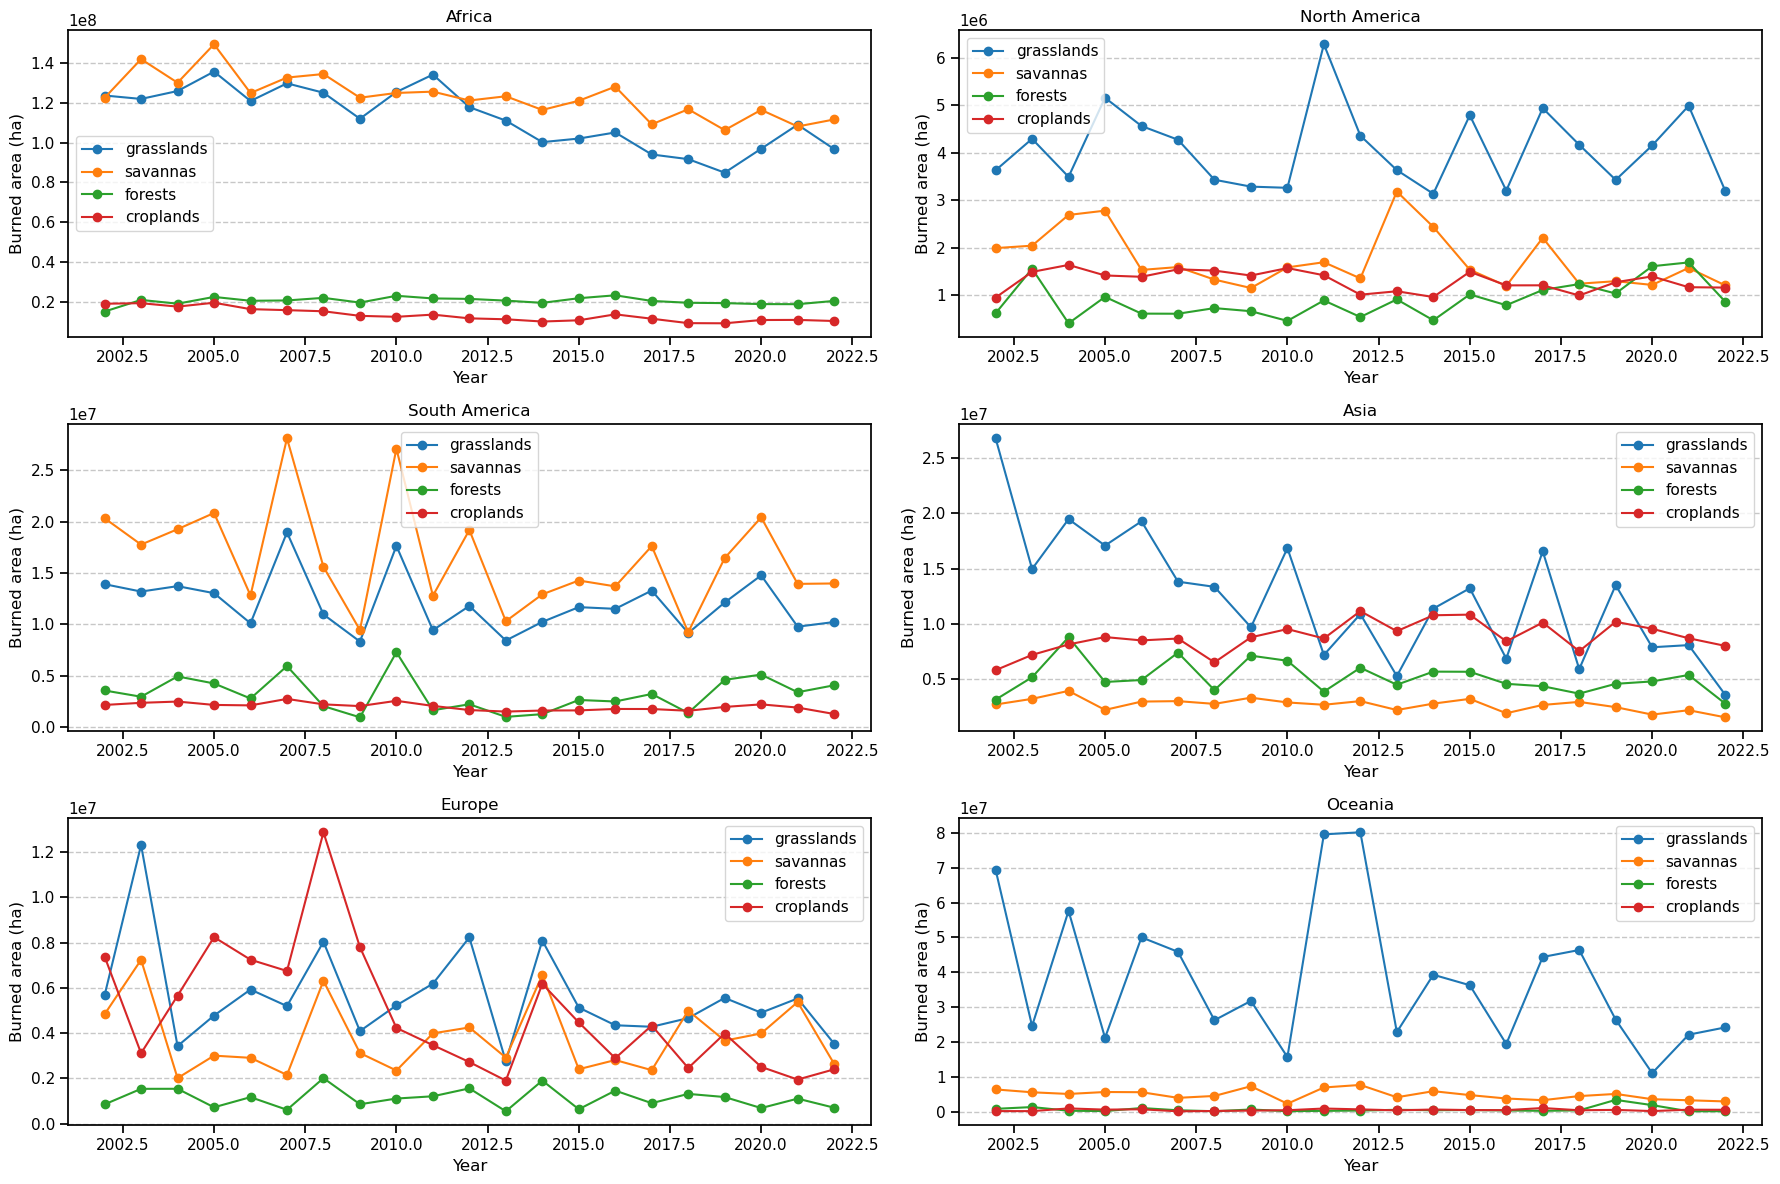

In [27]:
import matplotlib.pyplot as plt

# Continents and land types
continents = [
    'Africa', 
    'North America', 
    'South America',  
    'Asia', 
    'Europe', 
    'Oceania' 
]

land_types = [
    'Yearly burned area across shrublands and grasslands',
    'Yearly burned area across savannas',
    'Yearly burned area across forests',
    'Yearly burned area across croplands'
]

# Plotting
plt.figure(figsize=(18, 12))

# Loop through each continent
for i, continent in enumerate(continents, 1):
    plt.subplot(3, 2, i)
    plt.title(continent)
    plt.xlabel('Year')
    plt.ylabel('Burned area (ha)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Loop through each land type
    for land_type in land_types:
        # Extract data for the current continent and land type
        data = filtered_area_burnt_type_by_continent[continent]
        years = data['Year']
        burned_area = data[land_type]
        
        # Plot
        plt.plot(years, burned_area, label=land_type.split(' ')[-1], marker='o')

    plt.legend()

plt.tight_layout()
plt.show()
